<a href="https://colab.research.google.com/github/JakeMavrides/AI-For-Beginners/blob/main/MovementDetectionLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Palm Movement Detection using Optical Flow

This lab is part of [AI for Beginners Curriculum](http://aka.ms/ai-beginners).

Consider [this video](palm-movement.mp4), in which a person's palm moves left/right/up/down on the stable background.

<img src="../images/palm-movement.png" width="30%" alt="Palm Movement Frame"/>

**Your goal** would be to use Optical Flow to determine, which parts of video contain up/down/left/right movements. 

Start by getting video frames as described in the lecture:

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Total Frames: 242


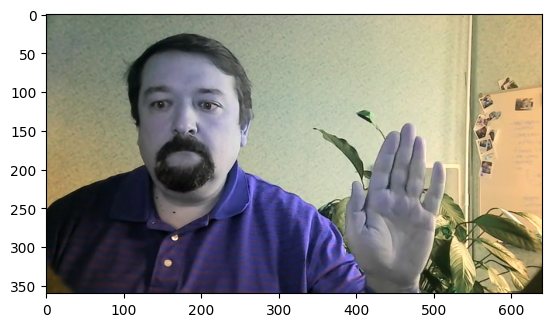

In [20]:
vid = cv2.VideoCapture('palm-movement.mp4')
frames = []
while vid.isOpened():
  retval, frame = vid.read()
  if not retval:
    break
  frames.append(frame)
vid.release()
print('Total Frames:', len(frames))
plt.imshow(frames[100])

Now, calculate dense optical flow frames as described in the lecture, and convert dense optical flow to polar coordinates: 

In [23]:
bw_frames = [cv2.cvtColor(x, cv2.COLOR_BGR2GRAY) for x in frames]
flows = [cv2.calcOpticalFlowFarneback(f1, f2, None, .5, 3, 15, 3, 5, 1.2, 0) # f1 is prev frame, f2 is next frame
         for f1, f2 in zip(bw_frames[:-1], bw_frames[1:])]

241


In [24]:
print(flows[0].shape)
print(len(flows))

(360, 640, 2)
241


241 frames of 360x640 pixels each

Build histogram of directions for each of the optical flow frame. A histogram shows how many vectors fall under certain bin, and it should separate out different directions of movement on the frame.

> You may also want to zero out all vectors whose magnitude is below certain threshold. This will get rid of small extra movements in the video, such as eyes and head.

Plot the histograms for some of the frames.

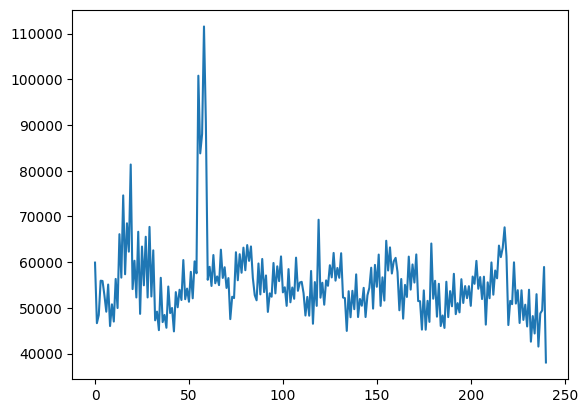

In [36]:
diffs = [(p2 - p1) for p1, p2 in zip(bw_frames[:-1], bw_frames[1:])]
diff_amps = np.array([np.linalg.norm(x) for x in diffs])
plt.plot(diff_amps)

In [52]:
threshold = 55000 # Remove values below a certain threshold to remove noise
active_frames = np.where(diff_amps > threshold)[0]

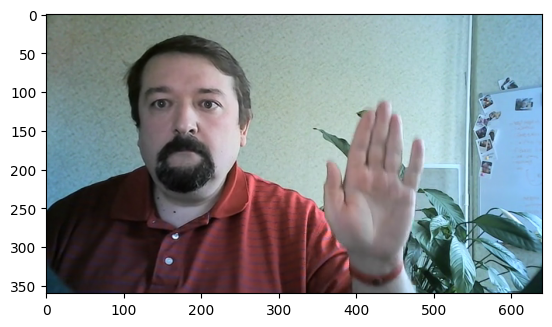

In [51]:
plt.imshow(cv2.cvtColor(frames[(active_frames[100] + active_frames[105]) // 2], cv2.COLOR_BGR2RGB))

Looking at histograms, it should be pretty straightforward how to determine direction of movement. You need to select those bins the correspond to up/down/left/right directions, and that are above certain threshold.

Congratulations! If you have done all steps above, you have completed the lab!